In [1]:
5+5

10

In [2]:
#load eda packages
import pandas as pd
import numpy as np


In [3]:
#load data visual package
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.neural_network import MLPClassifier

In [6]:
col_names = ['buying','maint','doors' ,'persons','lug_boot','safety','class']

In [8]:
df = pd.read_csv(car.data",names=col_names)

SyntaxError: EOL while scanning string literal (<ipython-input-8-f0a108df6e8e>, line 1)

In [10]:
df = pd.read_csv("C:\Users\shreyash\anaconda3\car evaluation\car.data",names=col_names)

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-10-93ead3b80eee>, line 1)

In [11]:
df = pd.read_csv("car.data",names=col_names)

FileNotFoundError: [Errno 2] File car.data does not exist: 'car.data'

In [12]:
df = pd.read_csv("car evaluation/car.data",names=col_names)

FileNotFoundError: [Errno 2] File car evaluation/car.data does not exist: 'car evaluation/car.data'

In [13]:
import os
notebook_path = os.path.abspath("Notebook.ipynb")

In [14]:
train_csv = os.path.join(os.path.dirname(notebook_path),"datasets/car.csv")
df = pd.read_csv("train_csv",names=col_names)

FileNotFoundError: [Errno 2] File train_csv does not exist: 'train_csv'

In [15]:
df = pd.read_csv("datasets/car.data",names=col_names)

In [16]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [17]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,med,med,5more,more,med,med,unacc
freq,432,432,432,576,576,576,1210


In [18]:
df.shape

(1728, 7)

In [19]:
df.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [21]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

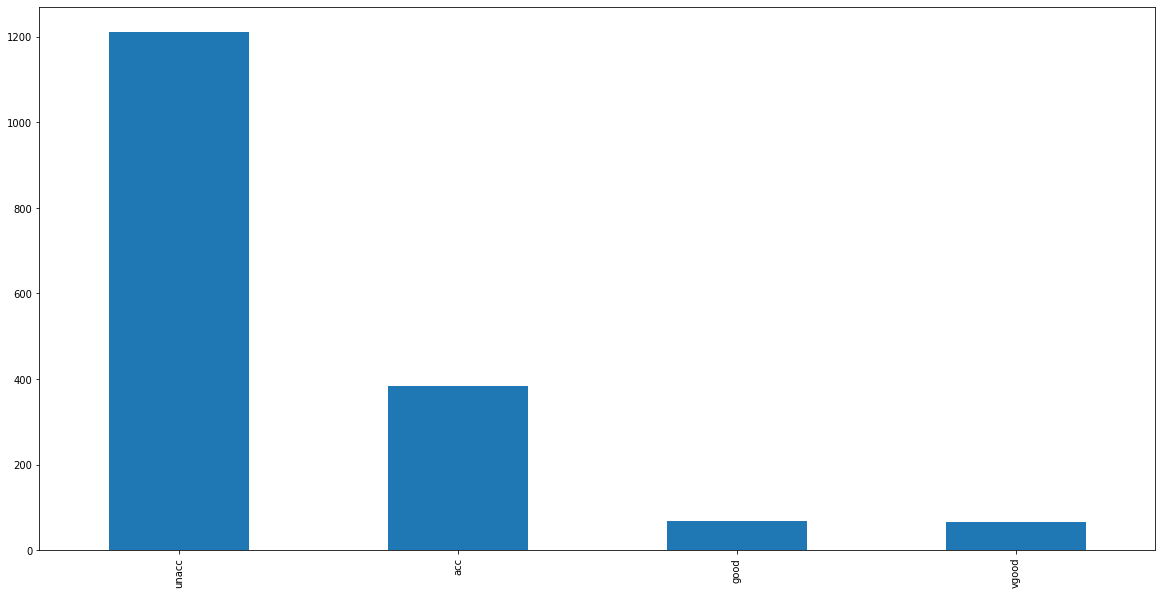

In [22]:
df['class'].value_counts().plot(kind='bar',figsize=(20,10))

In [23]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [24]:
buying_label = { ni: n for n,ni in enumerate(set(df['buying']))}
maint_label = { ni: n for n,ni in enumerate(set(df['maint']))}
doors_label = { ni: n for n,ni in enumerate(set(df['doors']))}
persons_label = { ni: n for n,ni in enumerate(set(df['persons']))}
lug_boot_label = { ni: n for n,ni in enumerate(set(df['lug_boot']))}
safety_label = { ni: n for n,ni in enumerate(set(df['safety']))}
class_label = { ni: n for n,ni in enumerate(set(df['class']))}

In [25]:
buying_label

{'high': 0, 'vhigh': 1, 'med': 2, 'low': 3}

In [26]:
df1['buying'] = df1['buying'].map(buying_label)

NameError: name 'df1' is not defined

In [27]:
df1=df

In [28]:
df1.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [29]:
df1['buying'] = df1['buying'].map(buying_label)

In [30]:
df1['maint'] = df1['maint'].map(maint_label)
df1['doors'] = df1['doors'].map(doors_label)

In [31]:
df1['persons'] = df1['persons'].map(persons_label)
df1['lug_boot'] = df1['lug_boot'].map(lug_boot_label)

In [32]:
df1['safety'] = df1['safety'].map(safety_label)
df1['class'] = df1['class'].map(class_label)

In [33]:
df1.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,0,0,1,2,2
1,1,1,0,0,1,1,2
2,1,1,0,0,1,0,2
3,1,1,0,0,0,2,2
4,1,1,0,0,0,1,2


In [34]:
df1.columns


Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [35]:
df1.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.104745
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.639394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.750000,0.000000,0.000000,0.000000,2.000000
50%,1.500000,1.500000,1.500000,1.000000,1.000000,1.000000,2.000000
75%,2.250000,2.250000,2.250000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,3.000000


In [36]:
Xfeatures = df1[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
ylabels = df1['class']

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(Xfeatures, ylabels, test_size=0.30, random_state=7)

In [38]:
logit = LogisticRegression()
logit.fit(X_train, Y_train)

C:\Users\shreyash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
print("Accuracy Score:",accuracy_score(Y_test, logit.predict(X_test)))

Accuracy Score: 0.791907514450867


In [40]:
nb=MultinomialNB()
nb.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [41]:
print("Accuracy Score:",accuracy_score(Y_test, nb.predict(X_test)))

Accuracy Score: 0.7398843930635838


In [42]:
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
nn_clf.fit(X_train,Y_train)

C:\Users\shreyash\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [43]:
print("Accuracy Score:",accuracy_score(Y_test, nn_clf.predict(X_test)))

Accuracy Score: 0.8265895953757225


In [44]:
import joblib

In [45]:
logit_model = open("logit_car_model.pkl","wb")
joblib.dump(logit,logit_model)
logit_model.close()

In [46]:
nb_model = open("nb_car_model.pkl","wb")
joblib.dump(nb,nb_model)
nb_model.close()

In [47]:
nn_clf_model = open("nn_clf_car_model.pkl","wb")
joblib.dump(nn_clf,nn_clf_model)
nn_clf_model.close()